#**Proyecto Capstone - La Batalla de los Vecindarios (Semana 2)**

**Exploración, Analisis y Visualización de Lugares y Restaurantes en Honduras: Un Enfoque de Ciencia de Datos Aplicada**

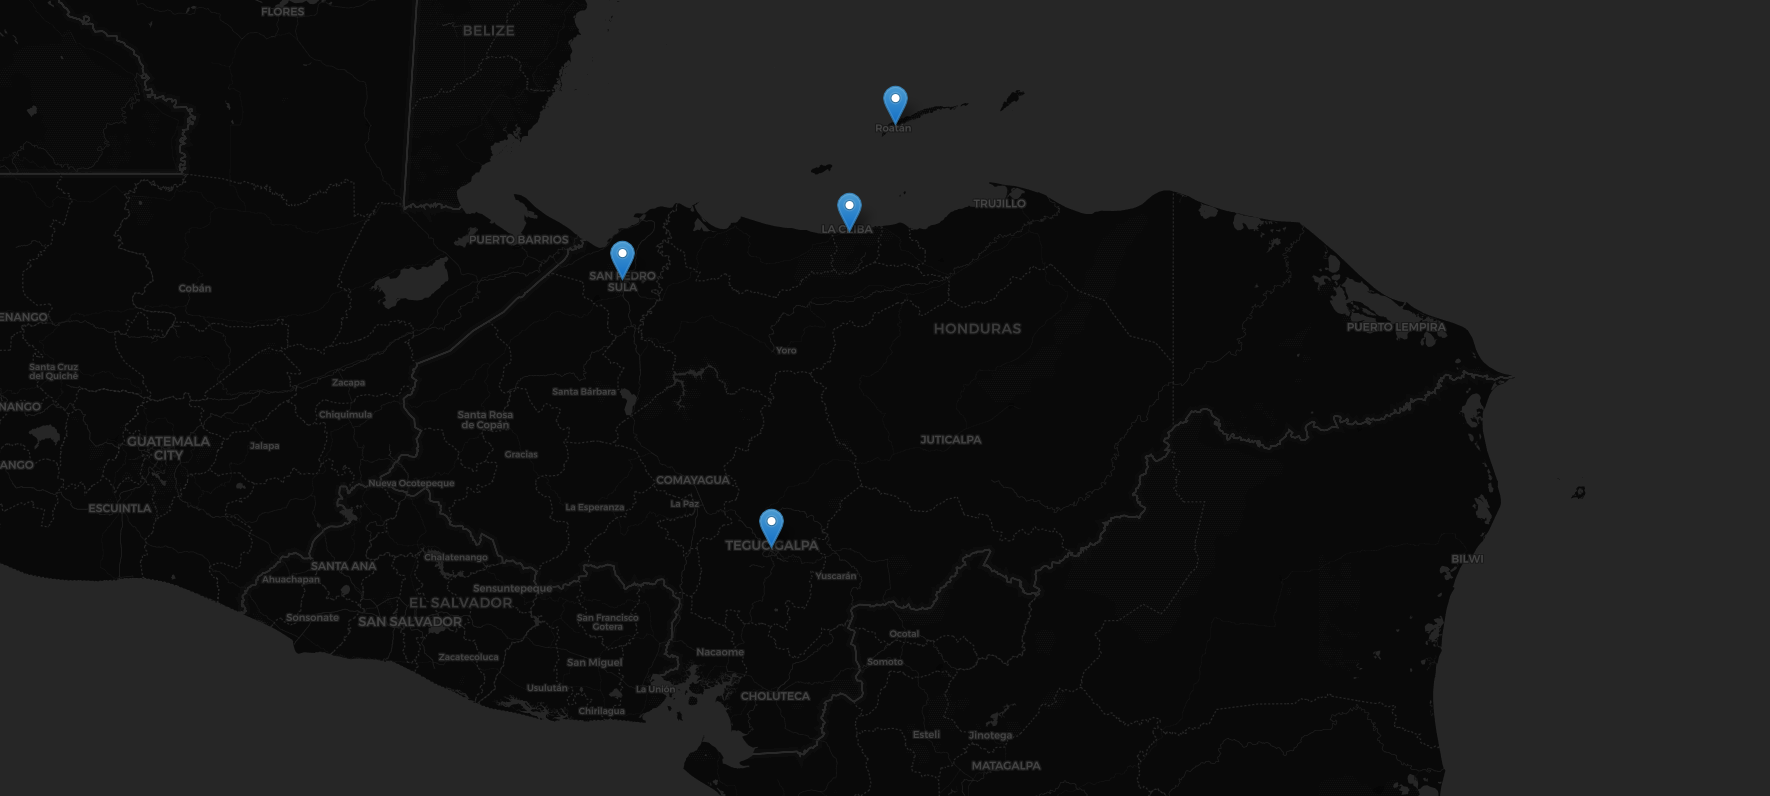

**Tabla de Contenido**


1.   [Introducción]()
2.   [Instalacion de librerias necesarias]()
3.   [Datos]()
4.   [Análisis]()
5.   [Conclusiones]()



#1. Introducción

Honduras es un país de América Central con una rica cultura y patrimonio, que atrae a turistas y viajeros de todo el mundo. Con el objetivo de ayudar a los visitantes a encontrar lugares de interés y restaurantes en Honduras, al igual de brindar información importante a personas que tienen la idea de abrir un restaurante en cierta ciudad de Honduras, se propone este proyecto de Ciencia de Datos Aplicada.

El objetivo principal de este proyecto es obtener datos de ubicación de lugares y restaurantes en Honduras utilizando la API de Foursquare, y visualizarlos en un mapa interactivo utilizando la biblioteca de Python Folium. Se explorará la obtención de datos geográficos de diferentes regiones de Honduras, se analizarán los lugares obtenidos y se mostrarán los restaurantes en un mapa interactivo para facilitar la identificación de opciones en cada región.

El proyecto utilizará herramientas de programación en Python, incluyendo pandas para el procesamiento de datos, requests para hacer llamadas a la API de Foursquare, y Folium para la visualización de mapas interactivos. También se utilizarán técnicas de análisis y visualización de datos para obtener información útil de los datos obtenidos y presentarla de manera efectiva.

El resultado final del proyecto serán análisis con gráficos y mapa interactivos que muestre los lugares y restaurantes en Honduras, lo cual será útil para los visitantes y viajeros que buscan explorar el país y encontrar opciones de comida en diferentes regiones, así como para las que las personas están interesadas en abrir un restaurante tenga la orientación sobre qué ciudades les convienen más.

#2. Instalación de librerias necesarias

A continuación importaremos e instalaremos las librerias necesarias para poder importar, analisis y visualizar los datos con los que se trabajara.

Cabe mencionar que las instalaciones de estas librerias, dependerian de versiones de la plataforma en la que trabajamos, ya que no siempre se podra instalar una libreria con el comando !conda, en este caso se instalaron librerias con !pip.

In [1]:
#Importar las librerias que necesitare para el grafico
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium 

#!conda install -c conda-forge geopy --yes
!pip install  geopy
from geopy.geocoders import Nominatim

#FALTA la de json_normalize

!pip install geocoder
!pip install opencage
import geocoder
import opencage.geocoder

import requests

import matplotlib.pyplot as plt
import seaborn as sns

print('Librerias importadas')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.9 MB/s eta 0:00:00
Librerias importadas


#3. Datos

Pagina web donde se obtienen los datos: https://edu-honduras.info/Educacion/Civico/Los%20C%C3%B3digos%20postales%20de%20Honduras.html#gsc.tab=0 

La recopilación de datos es una parte esencial de cualquier proyecto que involucre análisis de datos. En este caso, los datos son obtenidos de la página web antes mencionada, que contiene una lista de códigos postales de Honduras junto con información sobre los Departamentos y sus ciudades correspondientes.

Una vez ya obtenidos los datos, se procede a transformar en una estructura de datos adecuada para su análisis, en DataFrame, que es una estructura de datos tabular, puede ser utilizado para organizar y manipular los datos de manera eficiente.

Con la información de las ciudades o lugares asociados a los códigos postales en el DataFrame, podremos proceder a obtener sus coordenadas geográficas. Las
coordenadas de latitud y longitud son valores numéricos que representan la ubicación geográfica precisa de un lugar en la tierra, y se hara utilizando servicios de geolocalización en línea, como geocoder, Nominatim entre otras.

Una vez que obtenidas las coordenadas geográficas de las ciudades o lugares de
interés, se utilizara la API de Foursquare para obtener información sobre lugares cercanos como, restaurantes, hoteles, atracciones turísticas, y otros puntos de interés, en función de las coordenadas geográficas proporcionadas. Con los datos obtenidos de la API de Foursquare, se llevara a cabo análisis y visualización de datos para obtener información relevante.

En resumen, los datos obtenidos de la página web seran transformados en un
DataFrame, seguidamente obtener las coordenadas geográficas de las ciudades o
lugares de interés, seguidamente se utilizara la API de Foursquare para obtener datos sobre lugares cercanos como restaurante

Primero accederemos al sitio web edu-honduras.info para obtener data importante que necesitaremos para realizar este proyecto. Este sitio web  nos brindara los departamentos de Honduras y sus ciudades mas importantes.







In [293]:

url = 'https://edu-honduras.info/Educacion/Civico/Los%20C%C3%B3digos%20postales%20de%20Honduras.html#gsc.tab=0'

df_list = pd.read_html(url)
df1 = df_list[0]
df1

Departamento                    Ciudad  Código
0           Atlántida                  La Ceiba   31101
1           Atlántida                      Tela   31301
2               Colón                  Trujillo   32101
3               Colón                     Tocoa   32301
4           Comayagua                 Comayagua   12101
5           Comayagua              Siguatepeque   12111
6               Copán       Santa Rosa de Copán   41101
7               Copán                La Entrada   41202
8              Cortés       San Pedro Sula N.E.   21101
9              Cortés       San Pedro Sula N.O.   21102
10             Cortés       San Pedro Sula S.E.   21103
11             Cortés       San Pedro Sula S.O.   21104
12             Cortés             Puerto Cortés   21301
13             Cortés                   Choloma   21112
14          Choluteca                 Choluteca   51101
15          Choluteca                   Pespire   51201
16         El Paraíso                  Yuscarán   13101
17         El Paraíso                     Danlí   13201
18  Francisco Morazán               Tegucigalpa   11101
19  Francisco Morazán               Comayagüela   12101
20     Gracias a Dios            Puerto Lempira   33101
21           Intibucá              La Esperanza   14101
22           Intibucá            Jesús de Otoro   14201
23  Islas de la Bahía                    Roatán   34101
24             La Paz                    La Paz   15101
25             La Paz                   Marcala   15201
26            Lempira                   Gracias   42101
27            Lempira                 Erandique   42201
28         Ocotepeque                Ocotepeque   43101
29         Ocotepeque  San Marcos de Ocotepeque   43201
30            Olancho                 Juticalpa   16101
31            Olancho                 Catacamas   16201
32      Santa Bárbara             Santa Bárbara   22101
33      Santa Bárbara                  Trinidad   22114
34              Valle                   Nacaome   52101
35              Valle               San Lorenzo   52102
36               Yoro                      Yoro   23101
37               Yoro               El Progreso   23201

In [239]:
print('El tamaño de los datos obtenidos son: ', df1.shape)

El tamaño de los datos obtenidos son:  (38, 3)


En este caso utilizaremos las ciudades para poder obtener sus coordenadas. Si utilizamos los códigos postales tendremos redundancia de datos "basura" al utilizar opecage, ya que los códigos postales obtenidos son como un tipo de referencia para otros países fuera de Honduras, como ser Lituania, Corea del sur, entre otros. Es por ello que mediante las ciudades obtendremos las coordenadas con opencage.

In [240]:
#Obtenemos solo las ciudades y los obtenemos como una lista

ciudades_list = df1['Ciudad'].tolist()
ciudades_list

['La Ceiba',
 'Tela',
 'Trujillo',
 'Tocoa',
 'Comayagua',
 'Siguatepeque',
 'Santa Rosa de Copán',
 'La Entrada',
 'San Pedro Sula N.E.',
 'San Pedro Sula N.O.',
 'San Pedro Sula S.E.',
 'San Pedro Sula S.O.',
 'Puerto Cortés',
 'Choloma',
 'Choluteca',
 'Pespire',
 'Yuscarán',
 'Danlí',
 'Tegucigalpa',
 'Comayagüela',
 'Puerto Lempira',
 'La Esperanza',
 'Jesús de Otoro',
 'Roatán',
 'La Paz',
 'Marcala',
 'Gracias',
 'Erandique',
 'Ocotepeque',
 'San Marcos de Ocotepeque',
 'Juticalpa',
 'Catacamas',
 'Santa Bárbara',
 'Trinidad',
 'Nacaome',
 'San Lorenzo',
 'Yoro',
 'El Progreso']

Ya obtenidas las ciudades, mediante la libreria de opencage obtendremos las coordenadas de estas ciudades.

In [241]:

latitudes = []
longitudes = []
ciudades = []

for ciudad in ciudades_list:
    api_key = "b23627b996694bb8a398fc5e1ff7eff7"
    geocoder = opencage.geocoder.OpenCageGeocode(api_key)
    query = ciudad
    result = geocoder.geocode(str(query))
    if len(result) > 0:
        latitudes.append(result[0]['geometry']['lat'])
        longitudes.append(result[0]['geometry']['lng'])
        ciudades.append(ciudad)
    diccionario = {'Ciudad': ciudades, 'Latitude': latitudes, 'Longitude': longitudes }

Convertir el diccionario en un DataFrame

In [242]:

df2 = pd.DataFrame(diccionario)
df2

Ciudad   Latitude  Longitude
0                   La Ceiba  15.783374 -86.791775
1                       Tela  15.717522 -87.595463
2                   Trujillo  39.460566  -5.881663
3                      Tocoa  15.657581 -86.004971
4                  Comayagua  14.452798 -87.637923
5               Siguatepeque  14.597809 -87.835307
6        Santa Rosa de Copán  14.808795 -88.786584
7                 La Entrada  10.300103 -68.053825
8        San Pedro Sula N.E.  18.000000   9.000000
9        San Pedro Sula N.O.  62.444470   6.212290
10       San Pedro Sula S.E.  62.000000  15.000000
11       San Pedro Sula S.O.   6.000000  48.000000
12             Puerto Cortés  15.851465 -87.942668
13                   Choloma  15.612743 -87.950694
14                 Choluteca  13.371420 -87.071396
15                   Pespire  13.590890 -87.361943
16                  Yuscarán  13.941307 -86.852213
17                     Danlí  14.063517 -86.408294
18               Tegucigalpa  14.105743 -87.204005
19               Comayagüela  14.098008 -87.209967
20            Puerto Lempira  15.265628 -83.774063
21              La Esperanza  14.869230 -91.571301
22            Jesús de Otoro  14.542885 -88.012786
23                    Roatán  16.327423 -86.536481
24                    La Paz -16.495545 -68.133623
25                   Marcala  14.126236 -88.002504
26                   Gracias  14.629466 -88.613363
27                 Erandique  14.245548 -88.473736
28                Ocotepeque  14.425124 -89.224893
29  San Marcos de Ocotepeque  14.409374 -88.954546
30                 Juticalpa  14.667203 -86.219583
31                 Catacamas  14.848383 -85.893562
32             Santa Bárbara -19.959444 -43.415278
33                  Trinidad  10.443024 -61.261305
34                   Nacaome  13.492397 -87.539233
35               San Lorenzo  42.383211   9.287966
36                      Yoro  15.280028 -87.238252
37               El Progreso  14.852206 -90.064891

Unir los 2 dataframe "df1" y "df2" (marco de datos) para un llevar un mejor marco de datos de datos o informacion para el usuario. Nuestra columnas Ciudad sera nuestra llave de validación para la union correcta.

In [243]:

df = pd.merge(df1, df2, on = 'Ciudad')
df

Departamento                    Ciudad  Código   Latitude  Longitude
0           Atlántida                  La Ceiba   31101  15.783374 -86.791775
1           Atlántida                      Tela   31301  15.717522 -87.595463
2               Colón                  Trujillo   32101  39.460566  -5.881663
3               Colón                     Tocoa   32301  15.657581 -86.004971
4           Comayagua                 Comayagua   12101  14.452798 -87.637923
5           Comayagua              Siguatepeque   12111  14.597809 -87.835307
6               Copán       Santa Rosa de Copán   41101  14.808795 -88.786584
7               Copán                La Entrada   41202  10.300103 -68.053825
8              Cortés       San Pedro Sula N.E.   21101  18.000000   9.000000
9              Cortés       San Pedro Sula N.O.   21102  62.444470   6.212290
10             Cortés       San Pedro Sula S.E.   21103  62.000000  15.000000
11             Cortés       San Pedro Sula S.O.   21104   6.000000  48.000000
12             Cortés             Puerto Cortés   21301  15.851465 -87.942668
13             Cortés                   Choloma   21112  15.612743 -87.950694
14          Choluteca                 Choluteca   51101  13.371420 -87.071396
15          Choluteca                   Pespire   51201  13.590890 -87.361943
16         El Paraíso                  Yuscarán   13101  13.941307 -86.852213
17         El Paraíso                     Danlí   13201  14.063517 -86.408294
18  Francisco Morazán               Tegucigalpa   11101  14.105743 -87.204005
19  Francisco Morazán               Comayagüela   12101  14.098008 -87.209967
20     Gracias a Dios            Puerto Lempira   33101  15.265628 -83.774063
21           Intibucá              La Esperanza   14101  14.869230 -91.571301
22           Intibucá            Jesús de Otoro   14201  14.542885 -88.012786
23  Islas de la Bahía                    Roatán   34101  16.327423 -86.536481
24             La Paz                    La Paz   15101 -16.495545 -68.133623
25             La Paz                   Marcala   15201  14.126236 -88.002504
26            Lempira                   Gracias   42101  14.629466 -88.613363
27            Lempira                 Erandique   42201  14.245548 -88.473736
28         Ocotepeque                Ocotepeque   43101  14.425124 -89.224893
29         Ocotepeque  San Marcos de Ocotepeque   43201  14.409374 -88.954546
30            Olancho                 Juticalpa   16101  14.667203 -86.219583
31            Olancho                 Catacamas   16201  14.848383 -85.893562
32      Santa Bárbara             Santa Bárbara   22101 -19.959444 -43.415278
33      Santa Bárbara                  Trinidad   22114  10.443024 -61.261305
34              Valle                   Nacaome   52101  13.492397 -87.539233
35              Valle               San Lorenzo   52102  42.383211   9.287966
36               Yoro                      Yoro   23101  15.280028 -87.238252
37               Yoro               El Progreso   23201  14.852206 -90.064891

Estas dos funciones serviran para extraer el id y name de la categoria cuando utilizemos la api de Foursquare.

In [244]:
#Funciones para extraer el id y name de la categoria

#Extraer el id de la categoria
def get_categoria_id(fila):
  try:
    categories_list = fila['categories']
  except:
    categories_list = fila['venue.categories']

  if len(categories_list) == 0:
    return None
  else:
    return int(categories_list[0]['id'])


#Extraer el nombre de la categoria
def get_categoria_name(fila):
  try:
    categories_list = fila['categories']
  except:
    categories_list = fila['venue.categories']

  if len(categories_list) == 0:
    return None
  else:
    return categories_list[0]['name']

In [245]:
#Credenciales para consumir API de Foursquare
CLIENT_ID = 'RMXMIRPZCHMMW3SRGP1IFNJQTLPWWBLJ4FU3J4S0WUCIO3GK'
CLIENT_SECRET= 'HRIIYFBLZBAWPHEMIQT2R0N5VNLMXHJLH4EKRHJBINIWZHPQ'
LIMIT = 50                 # límite de número de lugares devueltos por la API de Foursquare
radius = 500               # Defino el Radio
VERSION = '20220411'

Lastimosamente foursquare solo nos permite un LIMIT maximo de 50 lugares.

Mediante la funcion **ObtenerLugaresCercanos** se hace uso de la API de Foursquare para obtener lugares cercanos de las ciudades, para ellos le enviamos las coordenadas (Latitud, Longitud) de cada ciudad.

La funcion devolvera las columnas:
* Ciudad
* ciudad_latitude
* ciudad_longitude
* Lugar
* lugar_latitude
* lugar_longitude
* Id_Categoria
* Nombre_Categoria

In [246]:
def ObtenerLugaresCercanos(ciudades, latitudes, longitudes, radius=500):
    lugares = []

    for ciudad, lat, lng in zip(ciudades, latitudes, longitudes):
        print(ciudad, 'procesando...')

        url = 'https://api.foursquare.com/v3/places/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        headers = {
            "Accept": "application/json",
            "Authorization": "fsq3qyREQez7zq7bW8STtP4U+ePKmJHqb06LJfwfNNjZcRA=" #en la administracion del proyecto puedes crear API KEYS DE FOURSQUARE
        }

        # Comunicación con la API de Foursquare
        response = requests.request("GET", url, headers=headers)
        result = response.json()
        json_results = result['results']

      
        results = json_normalize(json_results)

        if 'name' in results.columns and 'categories' in results.columns:    # Verificar que 'name' y 'categories' están presentes
          columnas = ['name'] + ['categories'] + [col for col in results.columns if col.startswith('geocodes.main')]
          results = results.loc[:, columnas]
          results['Id_Categoria'] = results.apply(get_categoria_id, axis=1)
          results['Nombre_Categoria'] = results.apply(get_categoria_name, axis=1)
          results.columns = [col.split(".")[-1] for col in results.columns]

                # Regresar solo la información necesaria
        for l in results.itertuples(index=False):
             lugares.append((ciudad, lat, lng, l.name, l.latitude, l.longitude, l.Id_Categoria, l.Nombre_Categoria))

    lugares = pd.DataFrame(lugares, columns=['Ciudad', 'ciudad_latitude', 'ciudad_longitude', 'Lugar', 'lugar_latitude', 'lugar_longitude', 'Id_Categoria', 'Nombre_Categoria'])

    return lugares



Llamamos la funcion y le mandamos las 3 columnas necesarias que son las ciudades y sus coordenadas. Se guardara en un dataframe llamado honduras.


In [247]:
#Llamando la funcion

honduras = ObtenerLugaresCercanos(ciudades=df['Ciudad'], 
                                  latitudes=df['Latitude'], 
                                  longitudes=df['Longitude']
                                  )



La Ceiba procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)
<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Tela procesando...
Trujillo procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Tocoa procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Comayagua procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Siguatepeque procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Santa Rosa de Copán procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


La Entrada procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


San Pedro Sula N.E. procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


San Pedro Sula N.O. procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)
<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


San Pedro Sula S.E. procesando...
San Pedro Sula S.O. procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Puerto Cortés procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Choloma procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Choluteca procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Pespire procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Yuscarán procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)
<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Danlí procesando...
Tegucigalpa procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Comayagüela procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Puerto Lempira procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


La Esperanza procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)
<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Jesús de Otoro procesando...
Roatán procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


La Paz procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)
<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Marcala procesando...
Gracias procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Erandique procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Ocotepeque procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


San Marcos de Ocotepeque procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Juticalpa procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)
<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Catacamas procesando...
Santa Bárbara procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Trinidad procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Nacaome procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


San Lorenzo procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)
<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Yoro procesando...
El Progreso procesando...


<ipython-input-246-765a17bb260d>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results = json_normalize(json_results)


Visualizamos nuestro dataframe honduras

In [248]:
honduras

Ciudad  ciudad_latitude  ciudad_longitude  \
0                    La Ceiba        15.783374        -86.791775   
1                    La Ceiba        15.783374        -86.791775   
2                    La Ceiba        15.783374        -86.791775   
3                    La Ceiba        15.783374        -86.791775   
4                    La Ceiba        15.783374        -86.791775   
5                    La Ceiba        15.783374        -86.791775   
6                    La Ceiba        15.783374        -86.791775   
7                    La Ceiba        15.783374        -86.791775   
8                    La Ceiba        15.783374        -86.791775   
9                    La Ceiba        15.783374        -86.791775   
10                   La Ceiba        15.783374        -86.791775   
11                   La Ceiba        15.783374        -86.791775   
12                   La Ceiba        15.783374        -86.791775   
13                   La Ceiba        15.783374        -86.791775   
14                   La Ceiba        15.783374        -86.791775   
15                   La Ceiba        15.783374        -86.791775   
16                   La Ceiba        15.783374        -86.791775   
17                   La Ceiba        15.783374        -86.791775   
18                   La Ceiba        15.783374        -86.791775   
19                   La Ceiba        15.783374        -86.791775   
20                   La Ceiba        15.783374        -86.791775   
21                   La Ceiba        15.783374        -86.791775   
22                   La Ceiba        15.783374        -86.791775   
23                   La Ceiba        15.783374        -86.791775   
24                   La Ceiba        15.783374        -86.791775   
25                   La Ceiba        15.783374        -86.791775   
26                   La Ceiba        15.783374        -86.791775   
27                   La Ceiba        15.783374        -86.791775   
28                   La Ceiba        15.783374        -86.791775   
29                   La Ceiba        15.783374        -86.791775   
30                   La Ceiba        15.783374        -86.791775   
31                   La Ceiba        15.783374        -86.791775   
32                   La Ceiba        15.783374        -86.791775   
33                   La Ceiba        15.783374        -86.791775   
34                   La Ceiba        15.783374        -86.791775   
35                   La Ceiba        15.783374        -86.791775   
36                   La Ceiba        15.783374        -86.791775   
37                   La Ceiba        15.783374        -86.791775   
38                   La Ceiba        15.783374        -86.791775   
39                   La Ceiba        15.783374        -86.791775   
40                   La Ceiba        15.783374        -86.791775   
41                   La Ceiba        15.783374        -86.791775   
42                   La Ceiba        15.783374        -86.791775   
43                   La Ceiba        15.783374        -86.791775   
44                   La Ceiba        15.783374        -86.791775   
45                   La Ceiba        15.783374        -86.791775   
46                   La Ceiba        15.783374        -86.791775   
47                   La Ceiba        15.783374        -86.791775   
48                   La Ceiba        15.783374        -86.791775   
49                   La Ceiba        15.783374        -86.791775   
50                   Trujillo        39.460566         -5.881663   
51                   Trujillo        39.460566         -5.881663   
52                   Trujillo        39.460566         -5.881663   
53                   Trujillo        39.460566         -5.881663   
54                   Trujillo        39.460566         -5.881663   
55                   Trujillo        39.460566         -5.881663   
56                   Trujillo        39.460566         -5.881663   
57                   Trujillo        39.460566         -5.881663   
58         

In [249]:
print('El tamaño del DataFrame de honduras es de: ', honduras.shape)

El tamaño del DataFrame de honduras es de:  (442, 8)


Observamos que tenemos 442 lugares, pero entre estos 442 lugares hay lugares fuera de Honduras y lo visualizamos en un mapa. 

Donde observaremos que foursquare devolvio lugares en otros paises distintos a Honduras.

In [250]:

mapa = folium.Map(location=[honduras['lugar_latitude'][0], honduras['lugar_longitude'][0]], zoom_start=3)

# Recorremos el DataFrame honduras y le ponemos una etiqueta o mejor dicho un icon para tener la mejor visualizacion posible de los lugares que obtuvimos con foursquare
for index, row in honduras.iterrows():
    folium.Marker([row['lugar_latitude'], row['lugar_longitude']],
                  popup=row['Lugar'],
                  icon=folium.Icon(icon='map-marker')).add_to(mapa)

mapa

Como se observa en el mapa, foursquare nos devolvio lugares que estan fuera del rango o fuera del territorio de Honduras.

Entonces se procedera a eliminar esos lugares que no son parte de Honduras. Para necesitamos obtener las coordenadas (Latitudes y Longitudes) minimas y maximas de Honduras.




In [251]:

latitud_min = 12.9828
latitud_max = 17.6205
longitud_min = -89.3533
longitud_max = -82.5728

# Mediante una condición booleana identificaremos las filas que están dentro de los límites/Territorio de Honduras
condicion = (honduras['ciudad_latitude'] >= latitud_min) & (honduras['ciudad_latitude'] <= latitud_max) & (honduras['ciudad_longitude'] >= longitud_min) & (honduras['ciudad_longitude'] <= longitud_max)

# Filtrar el DataFrame para obtener solo las filas que cumplen con la condición
honduras = honduras[condicion]

print('Ahora la cantidad de lugares es: ', honduras.shape)

Ahora la cantidad de lugares es:  (230, 8)


Visualizamos nuevamente el mapa, para verificar si se quitaron los lugares que no necesitamos o los lugares que estan fuera del territorio hondureño.

In [252]:
mapa = folium.Map(location=[honduras['lugar_latitude'][0], honduras['lugar_longitude'][0]], zoom_start=5)

# Recorremos el DataFrame honduras y le ponemos una etiqueta o mejor dicho un icon para tener la mejor visualizacion posible de los lugares que obtuvimos con foursquare
for index, row in honduras.iterrows():
    folium.Marker([row['lugar_latitude'], row['lugar_longitude']],
                  popup=row['Lugar'],
                  icon=folium.Icon(icon='map-marker')).add_to(mapa)

mapa

Observamos en el mapa que ya solo aparecen los lugares correctos.

Ahora observemos nuevamente el dataframe honduras, se nota que Id_Categoria esta en decimal. 

In [253]:
honduras.head()

Ciudad  ciudad_latitude  ciudad_longitude  \
0  La Ceiba        15.783374        -86.791775   
1  La Ceiba        15.783374        -86.791775   
2  La Ceiba        15.783374        -86.791775   
3  La Ceiba        15.783374        -86.791775   
4  La Ceiba        15.783374        -86.791775   

                             Lugar  lugar_latitude  lugar_longitude  \
0       Parque Central de La Ceiba       15.783886       -86.791643   
1                  Banco Promerica       15.783443       -86.792042   
2        Plaza Central de la Ceiba       15.783242       -86.791383   
3        Plaza Central de la Ceiba       15.783612       -86.791236   
4  Baleadas del parque de La Ceiba       15.783834       -86.791398   

   Id_Categoria      Nombre_Categoria  
0       16032.0                  Park  
1       11045.0                  Bank  
2       16041.0                 Plaza  
3       16032.0                  Park  
4       13145.0  Fast Food Restaurant

Pero para terminar de limpiar, del dataframe se eliminaran las filas que tenga Id_Catgoria con valores NaN, porque sino al querer convertir el Id_Categoria a entero (eliminar el decima .0) nos va a tirar error porque hay Id_Categoria que estan Nulos.


In [254]:

honduras = honduras.dropna(subset=['Id_Categoria']).astype({'Id_Categoria': int})

print('Ahora la cantidad de lugares es: ', honduras.shape)


Ahora la cantidad de lugares es:  (218, 8)


In [255]:
honduras.head()

Ciudad  ciudad_latitude  ciudad_longitude  \
0  La Ceiba        15.783374        -86.791775   
1  La Ceiba        15.783374        -86.791775   
2  La Ceiba        15.783374        -86.791775   
3  La Ceiba        15.783374        -86.791775   
4  La Ceiba        15.783374        -86.791775   

                             Lugar  lugar_latitude  lugar_longitude  \
0       Parque Central de La Ceiba       15.783886       -86.791643   
1                  Banco Promerica       15.783443       -86.792042   
2        Plaza Central de la Ceiba       15.783242       -86.791383   
3        Plaza Central de la Ceiba       15.783612       -86.791236   
4  Baleadas del parque de La Ceiba       15.783834       -86.791398   

   Id_Categoria      Nombre_Categoria  
0         16032                  Park  
1         11045                  Bank  
2         16041                 Plaza  
3         16032                  Park  
4         13145  Fast Food Restaurant

Ya los Id_Categoria no tiene el decimal.

Del primer DataFrame "df1" le agregare el Departamento al ultimo dataframe que es honduras

In [256]:
#Vemos el primer DataFrame, de este le agregare el Departamento al ultimo dataframe que es honduras
df1.head()

Departamento     Ciudad  Código
0    Atlántida   La Ceiba   31101
1    Atlántida       Tela   31301
2        Colón   Trujillo   32101
3        Colón      Tocoa   32301
4    Comayagua  Comayagua   12101

Al dataframe de honduras le agregamos la columna de Departamento. Y asi tener un DataFrame mas informativo para el usuario.

In [257]:

honduras = pd.merge(df1[['Departamento', 'Ciudad']], honduras, on='Ciudad', suffixes=('_df1', '_honduras'))
honduras

Departamento                    Ciudad  ciudad_latitude  \
0            Atlántida                  La Ceiba        15.783374   
1            Atlántida                  La Ceiba        15.783374   
2            Atlántida                  La Ceiba        15.783374   
3            Atlántida                  La Ceiba        15.783374   
4            Atlántida                  La Ceiba        15.783374   
5            Atlántida                  La Ceiba        15.783374   
6            Atlántida                  La Ceiba        15.783374   
7            Atlántida                  La Ceiba        15.783374   
8            Atlántida                  La Ceiba        15.783374   
9            Atlántida                  La Ceiba        15.783374   
10           Atlántida                  La Ceiba        15.783374   
11           Atlántida                  La Ceiba        15.783374   
12           Atlántida                  La Ceiba        15.783374   
13           Atlántida                  La Ceiba        15.783374   
14           Atlántida                  La Ceiba        15.783374   
15           Atlántida                  La Ceiba        15.783374   
16           Atlántida                  La Ceiba        15.783374   
17           Atlántida                  La Ceiba        15.783374   
18           Atlántida                  La Ceiba        15.783374   
19           Atlántida                  La Ceiba        15.783374   
20           Atlántida                  La Ceiba        15.783374   
21           Atlántida                  La Ceiba        15.783374   
22           Atlántida                  La Ceiba        15.783374   
23           Atlántida                  La Ceiba        15.783374   
24           Atlántida                  La Ceiba        15.783374   
25           Atlántida                  La Ceiba        15.783374   
26           Atlántida                  La Ceiba        15.783374   
27           Atlántida                  La Ceiba        15.783374   
28           Atlántida                  La Ceiba        15.783374   
29           Atlántida                  La Ceiba        15.783374   
30           Atlántida                  La Ceiba        15.783374   
31           Atlántida                  La Ceiba        15.783374   
32           Atlántida                  La Ceiba        15.783374   
33           Atlántida                  La Ceiba        15.783374   
34           Atlántida                  La Ceiba        15.783374   
35           Atlántida                  La Ceiba        15.783374   
36           Atlántida                  La Ceiba        15.783374   
37           Atlántida                  La Ceiba        15.783374   
38           Atlántida                  La Ceiba        15.783374   
39           Atlántida                  La Ceiba        15.783374   
40           Atlántida                  La Ceiba        15.783374   
41           Atlántida                  La Ceiba        15.783374   
42           Atlántida                  La Ceiba        15.783374   
43           Atlántida                  La Ceiba        15.783374   
44           Atlántida                  La Ceiba        15.783374   
45           Atlántida                  La Ceiba        15.783374   
46               Colón                     Tocoa        15.657581   
47               Colón                     Tocoa        15.657581   
48               Colón                     Tocoa        15.657581   
49               Colón                     Tocoa        15.657581   
50               Colón                     Tocoa        15.657581   
51               Colón                     Tocoa        15.657581   
52               Colón                     Tocoa        15.657581   
53               Colón                     Tocoa        15.657581   
54               Colón                     Tocoa        15.657581   
55               Colón                     Tocoa        15.657581   
56               Colón                     Tocoa        15.657581   
57      

Visualizemos en un grafico pastel la cantidad de lugares por Departamento.

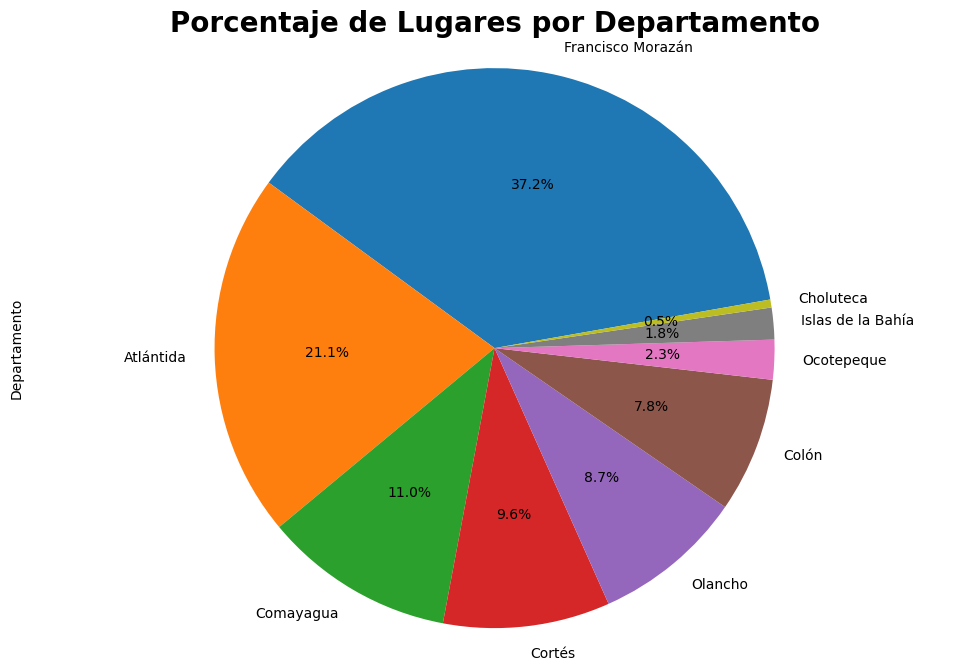

In [258]:
plt.figure(figsize=(12, 8))
honduras['Departamento'].value_counts().plot.pie(autopct='%1.1f%%', startangle=10)
plt.title('Porcentaje de Lugares por Departamento',size=20, weight='bold')
plt.axis('equal')
plt.show()

Agrupamos los lugares por Ciudad.

In [259]:

honduras.groupby('Ciudad').count()

Departamento  ciudad_latitude  ciudad_longitude  \
Ciudad                                                                      
Catacamas                           14               14                14   
Choloma                             17               17                17   
Comayagua                           19               19                19   
Comayagüela                         32               32                32   
Juticalpa                            5                5                 5   
La Ceiba                            46               46                46   
Pespire                              1                1                 1   
Puerto Cortés                        4                4                 4   
Roatán                               4                4                 4   
San Marcos de Ocotepeque             5                5                 5   
Siguatepeque                         5                5                 5   
Tegucigalpa                         49               49                49   
Tocoa                               17               17                17   

                          Lugar  lugar_latitude  lugar_longitude  \
Ciudad                                                             
Catacamas                    14              14               14   
Choloma                      17              17               17   
Comayagua                    19              19               19   
Comayagüela                  32              32               32   
Juticalpa                     5               5                5   
La Ceiba                     46              46               46   
Pespire                       1               1                1   
Puerto Cortés                 4               4                4   
Roatán                        4               4                4   
San Marcos de Ocotepeque      5               5                5   
Siguatepeque                  5               5                5   
Tegucigalpa                  49              49               49   
Tocoa                        17              17               17   

                          Id_Categoria  Nombre_Categoria  
Ciudad                                                    
Catacamas                           14                14  
Choloma                             17                17  
Comayagua                           19                19  
Comayagüela                         32                32  
Juticalpa                            5                 5  
La Ceiba                            46                46  
Pespire                              1                 1  
Puerto Cortés                        4                 4  
Roatán                               4                 4  
San Marcos de Ocotepeque             5                 5  
Siguatepeque                         5                 5  
Tegucigalpa                         49                49  
Tocoa                               17                17

Agrupamos los lugares por Departamento.

In [260]:

honduras.groupby('Departamento').count()

Ciudad  ciudad_latitude  ciudad_longitude  Lugar  \
Departamento                                                          
Atlántida              46               46                46     46   
Choluteca               1                1                 1      1   
Colón                  17               17                17     17   
Comayagua              24               24                24     24   
Cortés                 21               21                21     21   
Francisco Morazán      81               81                81     81   
Islas de la Bahía       4                4                 4      4   
Ocotepeque              5                5                 5      5   
Olancho                19               19                19     19   

                   lugar_latitude  lugar_longitude  Id_Categoria  \
Departamento                                                       
Atlántida                      46               46            46   
Choluteca                       1                1             1   
Colón                          17               17            17   
Comayagua                      24               24            24   
Cortés                         21               21            21   
Francisco Morazán              81               81            81   
Islas de la Bahía               4                4             4   
Ocotepeque                      5                5             5   
Olancho                        19               19            19   

                   Nombre_Categoria  
Departamento                         
Atlántida                        46  
Choluteca                         1  
Colón                            17  
Comayagua                        24  
Cortés                           21  
Francisco Morazán                81  
Islas de la Bahía                 4  
Ocotepeque                        5  
Olancho                          19

Cuantas categorias de lugares habran en toda Honduras con la data que hemos obtenido?

In [262]:

print('Hay {} categorias unicas en toda Honduras.'.format(len(honduras['Id_Categoria'].unique())))

Hay 76 categorias unicas en toda Honduras.


#4. Análisis

In [263]:
#Creamos un DataFrame en el que nos codifique las distintas categorias

honduras_onehot = pd.get_dummies(honduras[['Lugar']], prefix="", prefix_sep="")

#Agrego el Lugar y la pongo como primera columna
honduras_onehot['Lugar'] = honduras['Lugar']
fixed_columns = [honduras_onehot.columns[-1]] + list(honduras_onehot.columns[:-1])
honduras_onehot['Nombre_Categoria'] = honduras['Nombre_Categoria']

honduras_onehot = honduras_onehot[fixed_columns]
honduras_onehot.drop_duplicates(subset='Lugar', inplace=True)
honduras_onehot.head()

<ipython-input-263-ce35e0bffd0a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  honduras_onehot.drop_duplicates(subset='Lugar', inplace=True)


Lugar  316  ATM Banco Atlantida  \
0       Parque Central de La Ceiba    0                    0   
1                  Banco Promerica    0                    0   
2        Plaza Central de la Ceiba    0                    0   
4  Baleadas del parque de La Ceiba    0                    0   
5                 Church's Chicken    0                    0   

   Agencia Bac Centro Comayagua  Antigua Casa Presidencial  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
4                             0                          0   
5                             0                          0   

   Arabica Specialty Coffee  Arteflora  Arturo's Barbería  \
0                         0          0                  0   
1                         0          0                  0   
2                         0          0                  0   
4                         0          0                  0   
5                         0          0                  0   

   Auto Banco Atlantida 2da Avenida  Auto Servicio La Solucion  Autorepuestos  \
0                                 0                          0              0   
1                                 0                          0              0   
2                                 0                          0              0   
4                                 0                          0              0   
5                                 0                          0              0   

   BAC Honduras  Bac Bamer Choloma  Bac Policlinica  Baleadas Doña Tere  \
0             0                  0                0                   0   
1             0                  0                0                   0   
2             0                  0                0                   0   
4             0                  0                0                   0   
5             0                  0                0                   0   

   Baleadas de La Linea  Baleadas del parque de La Ceiba  Baledas Express  \
0                     0                                0                0   
1                     0                                0                0   
2                     0                                0                0   
4                     0                                1                0   
5                     0                                0                0   

   Banco Azteca  Banco Ficohsa  Banco Promerica  Banco Promerica Choloma  \
0             0              0                0                        0   
1             0              0                1                        0   
2             0              0                0                        0   
4             0              0                0                        0   
5             0              0                0                        0   

   Barberia El Centro  Bazar Diana  Bodega De Frutas y verduras la sureña  \
0                   0            0                                      0   
1                   0            0                                      0   
2                   0            0                                      0   
4                   0            0                                      0   
5                   0            0                                      0   

   Bodega y Distribuciones DIMA  Bodeguita San Antonio  Boulevard Café  \
0                             0                      0               0   
1                             0                      0               0   
2                             0                      0               0   
4                             0                      0               0   
5                             0                      0               0   

   Burger King  Burger King / Church's Chicken  CADENAS  \
0            0                               0        0   
1            0      

In [264]:
honduras_onehot.shape

(209, 210)

In [265]:
honduras_agrupado = honduras_onehot.groupby('Lugar').sum().reset_index()
honduras_agrupado.head()

Lugar  316  ATM Banco Atlantida  \
0                           316    1                    0   
1           ATM Banco Atlantida    0                    1   
2  Agencia Bac Centro Comayagua    0                    0   
3     Antigua Casa Presidencial    0                    0   
4      Arabica Specialty Coffee    0                    0   

   Agencia Bac Centro Comayagua  Antigua Casa Presidencial  \
0                             0                          0   
1                             0                          0   
2                             1                          0   
3                             0                          1   
4                             0                          0   

   Arabica Specialty Coffee  Arteflora  Arturo's Barbería  \
0                         0          0                  0   
1                         0          0                  0   
2                         0          0                  0   
3                         0          0                  0   
4                         1          0                  0   

   Auto Banco Atlantida 2da Avenida  Auto Servicio La Solucion  Autorepuestos  \
0                                 0                          0              0   
1                                 0                          0              0   
2                                 0                          0              0   
3                                 0                          0              0   
4                                 0                          0              0   

   BAC Honduras  Bac Bamer Choloma  Bac Policlinica  Baleadas Doña Tere  \
0             0                  0                0                   0   
1             0                  0                0                   0   
2             0                  0                0                   0   
3             0                  0                0                   0   
4             0                  0                0                   0   

   Baleadas de La Linea  Baleadas del parque de La Ceiba  Baledas Express  \
0                     0                                0                0   
1                     0                                0                0   
2                     0                                0                0   
3                     0                                0                0   
4                     0                                0                0   

   Banco Azteca  Banco Ficohsa  Banco Promerica  Banco Promerica Choloma  \
0             0              0                0                        0   
1             0              0                0                        0   
2             0              0                0                        0   
3             0              0                0                        0   
4             0              0                0                        0   

   Barberia El Centro  Bazar Diana  Bodega De Frutas y verduras la sureña  \
0                   0            0                                      0   
1                   0            0                                      0   
2                   0            0                                      0   
3                   0            0                                      0   
4                   0            0                                      0   

   Bodega y Distribuciones DIMA  Bodeguita San Antonio  Boulevard Café  \
0                             0                      0               0   
1                             0                      0               0   
2                             0                      0               0   
3                             0                      0               0   
4                             0                      0               0   

   Burger King  Burger King / Church's Chicken  CADENAS  \
0            0                               0        0   
1            0                     

In [266]:
honduras_agrupado.shape

(209, 210)

En este caso como queremos visualizar todos los lugares obtenidos de honduras, necesitamos mostrar el mapa de Honduras completo y asi visualizar los lugares en sus diferentes ciudades y departamentos. Para se necesita las coordenadas de Honduras y se obtendran con la ayuda de Nominatim.

In [267]:

address = 'Honduras'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address) 
latitude = location.latitude
longitude = location.longitude

print('La coordenadas del mapa de Honduras son: ', latitude, ', ', longitude)
print(location)

La coordenadas del mapa de Honduras son:  15.2572432 ,  -86.0755145
Honduras


Para continuar con el analisis de datos , se utilizara kmeans.

In [268]:
#Agrupar Lugares

kclusters = 5
#honduras_agrupado = honduras_agrupado.drop('Lugar', axis=1)  #Necesitamos eliminar la o las columnas que tengan string, solo necesitamos columnas con numeros

#Pero para no eliminar completamente la columna "Lugar" solo la eliminaremos en el momento que utilizemos KMeans
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(honduras_agrupado.drop('Lugar', axis=1))
#kmean.labels_[0:10]      Si solo quisiera ver 10
kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Añadimos las Etiqueta_de_clúster (Cluster_Labers),  y la ponemos como primera columna para mejor visibilidad.

In [269]:

honduras_agrupado.insert(0, 'Cluster_Label', kmeans.labels_)


Observamos que no se elimino la columna de "Lugar". Ademas Verificamos que si agregamos la columna de "Cluster_Label".

In [270]:

honduras_agrupado

Cluster_Label                                       Lugar  316  \
0                3                                         316    1   
1                3                         ATM Banco Atlantida    0   
2                3                Agencia Bac Centro Comayagua    0   
3                3                   Antigua Casa Presidencial    0   
4                3                    Arabica Specialty Coffee    0   
5                3                                   Arteflora    0   
6                3                           Arturo's Barbería    0   
7                3            Auto Banco Atlantida 2da Avenida    0   
8                3                   Auto Servicio La Solucion    0   
9                3                               Autorepuestos    0   
10               3                                BAC Honduras    0   
11               3                           Bac Bamer Choloma    0   
12               3                             Bac Policlinica    0   
13               3                          Baleadas Doña Tere    0   
14               3                        Baleadas de La Linea    0   
15               3             Baleadas del parque de La Ceiba    0   
16               3                             Baledas Express    0   
17               3                                Banco Azteca    0   
18               3                               Banco Ficohsa    0   
19               3                             Banco Promerica    0   
20               3                     Banco Promerica Choloma    0   
21               3                          Barberia El Centro    0   
22               3                                 Bazar Diana    0   
23               3       Bodega De Frutas y verduras la sureña    0   
24               3                Bodega y Distribuciones DIMA    0   
25               3                       Bodeguita San Antonio    0   
26               3                              Boulevard Café    0   
27               3                                 Burger King    0   
28               3              Burger King / Church's Chicken    0   
29               3                                     CADENAS    0   
30               3                 Cabezeperro Studios Choloma    0   
31               3                       Cable Color el centro    0   
32               3                                  Cafe Paris    0   
33               3                             Cafe y Taqueria    0   
34               3                        Cafeteria Beto Ochoa    0   
35               3                                      Cafeto    0   
36               3                               Café Tio Juan    0   
37               3                             Café con Libros    0   
38               3                                  Calle Real    0   
39               3                                    Canal 34    0   
40               3                          Car Center Pizzati    0   
41               3                           Carnitas La Negra    0   
42               3                        Carrion Mall Premier    0   
43               3                               Carrion Tocoa    0   
44               3                                   Casa Jaar    0   
45               3       Casa de la Cultura, Juticalpa-Olancho    0   
46               3                          Ceasars Restaurant    0   
47               3                       Centro Clínico Visual    0   
48               3                 Centro Comercial La Norteña    0   
49               3               Centro de Arte y Cultura UNAH    0   
50               3                             Champa swinford    0   
51               3                                     Chapala    0   
52               3                                 Chinda Diaz    0   
53               3                            Church's Chicken    0   
54               3                                       Claro    0   
55               3           

Agregemole las latitudes y longitudes a los lugares o simplemente unamos el DataFrame donde estas estas, mediante la conexion de "Lugar".

In [271]:

honduras_df = pd.merge(honduras, honduras_agrupado, on = 'Lugar')


In [272]:
honduras_df.head()

Departamento    Ciudad  ciudad_latitude  ciudad_longitude  \
0    Atlántida  La Ceiba        15.783374        -86.791775   
1    Atlántida  La Ceiba        15.783374        -86.791775   
2    Atlántida  La Ceiba        15.783374        -86.791775   
3    Atlántida  La Ceiba        15.783374        -86.791775   
4    Atlántida  La Ceiba        15.783374        -86.791775   

                             Lugar  lugar_latitude  lugar_longitude  \
0       Parque Central de La Ceiba       15.783886       -86.791643   
1                  Banco Promerica       15.783443       -86.792042   
2        Plaza Central de la Ceiba       15.783242       -86.791383   
3        Plaza Central de la Ceiba       15.783612       -86.791236   
4  Baleadas del parque de La Ceiba       15.783834       -86.791398   

   Id_Categoria      Nombre_Categoria  Cluster_Label  316  \
0         16032                  Park              3    0   
1         11045                  Bank              3    0   
2         16041                 Plaza              3    0   
3         16032                  Park              3    0   
4         13145  Fast Food Restaurant              3    0   

   ATM Banco Atlantida  Agencia Bac Centro Comayagua  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   Antigua Casa Presidencial  Arabica Specialty Coffee  Arteflora  \
0                          0                         0          0   
1                          0                         0          0   
2                          0                         0          0   
3                          0                         0          0   
4                          0                         0          0   

   Arturo's Barbería  Auto Banco Atlantida 2da Avenida  \
0                  0                                 0   
1                  0                                 0   
2                  0                                 0   
3                  0                                 0   
4                  0                                 0   

   Auto Servicio La Solucion  Autorepuestos  BAC Honduras  Bac Bamer Choloma  \
0                          0              0             0                  0   
1                          0              0             0                  0   
2                          0              0             0                  0   
3                          0              0             0                  0   
4                          0              0             0                  0   

   Bac Policlinica  Baleadas Doña Tere  Baleadas de La Linea  \
0                0                   0                     0   
1                0                   0                     0   
2                0                   0                     0   
3                0                   0                     0   
4                0                   0                     0   

   Baleadas del parque de La Ceiba  Baledas Express  Banco Azteca  \
0                                0                0             0   
1                                0                0             0   
2                                0                0             0   
3                                0                0             0   
4                                1                0             0   

   Banco Ficohsa  Banco Promerica  Banco Promerica Choloma  \
0              0                0                        0   
1              0                1                        0   
2              0                0                        0   
3              0                0                        0   
4              0                0                        0   

   Barberia El Centro  Bazar Diana  Bodega De Frutas y verduras la sureña 

Vemos que tenemos columnas que no necesitamos como "ciudad_latitude" y "ciudad_longitude".

"lugar_latitude"	y "lugar_longitude" si las necesitamos porque seran las que utilizaremos para crear el mapa.

In [273]:

honduras_df = honduras_df.drop(['ciudad_latitude', 'ciudad_longitude'], axis=1)


Vemos ahora que ya no estan las columnas de ciudad_latitude y ciudad_longitude.

In [274]:
honduras_df.head()

Departamento    Ciudad                            Lugar  lugar_latitude  \
0    Atlántida  La Ceiba       Parque Central de La Ceiba       15.783886   
1    Atlántida  La Ceiba                  Banco Promerica       15.783443   
2    Atlántida  La Ceiba        Plaza Central de la Ceiba       15.783242   
3    Atlántida  La Ceiba        Plaza Central de la Ceiba       15.783612   
4    Atlántida  La Ceiba  Baleadas del parque de La Ceiba       15.783834   

   lugar_longitude  Id_Categoria      Nombre_Categoria  Cluster_Label  316  \
0       -86.791643         16032                  Park              3    0   
1       -86.792042         11045                  Bank              3    0   
2       -86.791383         16041                 Plaza              3    0   
3       -86.791236         16032                  Park              3    0   
4       -86.791398         13145  Fast Food Restaurant              3    0   

   ATM Banco Atlantida  Agencia Bac Centro Comayagua  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   Antigua Casa Presidencial  Arabica Specialty Coffee  Arteflora  \
0                          0                         0          0   
1                          0                         0          0   
2                          0                         0          0   
3                          0                         0          0   
4                          0                         0          0   

   Arturo's Barbería  Auto Banco Atlantida 2da Avenida  \
0                  0                                 0   
1                  0                                 0   
2                  0                                 0   
3                  0                                 0   
4                  0                                 0   

   Auto Servicio La Solucion  Autorepuestos  BAC Honduras  Bac Bamer Choloma  \
0                          0              0             0                  0   
1                          0              0             0                  0   
2                          0              0             0                  0   
3                          0              0             0                  0   
4                          0              0             0                  0   

   Bac Policlinica  Baleadas Doña Tere  Baleadas de La Linea  \
0                0                   0                     0   
1                0                   0                     0   
2                0                   0                     0   
3                0                   0                     0   
4                0                   0                     0   

   Baleadas del parque de La Ceiba  Baledas Express  Banco Azteca  \
0                                0                0             0   
1                                0                0             0   
2                                0                0             0   
3                                0                0             0   
4                                1                0             0   

   Banco Ficohsa  Banco Promerica  Banco Promerica Choloma  \
0              0                0                        0   
1              0                1                        0   
2              0                0                        0   
3              0                0                        0   
4              0                0                        0   

   Barberia El Centro  Bazar Diana  Bodega De Frutas y verduras la sureña  \
0                   0            0                                      0   
1                   0            0                                      0   
2                   0            0                                      0   
3      

Ahora visualicemos todos los lugares con sus etiquetas de cluster.

Para tenes una mejor visualizacion se procede a crear una paleta manual de colores en un arreglo, donde el color de cluster sera el indice el arreglo de colores.

In [275]:
mapa_1 = folium.Map(location=[latitude, longitude], zoom_start=8)

#En este caso incializare una lista de colores y asi utilizar una mejor forma el numero de "Cluster_Label"
colores_Cluster = [ "Crimson", "Indigo", "Emerald", "Red", "Orange", "Yellow", "Green", "Blue", "Purple", "Pink", "Brown", "Black", "White", "Magenta", "Teal"]

#añadiendole sitios al mapa
for lat, lng, label, cluster in zip(honduras_df['lugar_latitude'], honduras_df['lugar_longitude'], honduras_df['Lugar'], honduras_df['Cluster_Label']):
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius = 5,
      popup = label,
      color = colores_Cluster[cluster],
      fill = True,
      fill_color = colores_Cluster[cluster - 1],
      fill_opacity = 0.6,
      parse_html = False
  ).add_to(mapa_1)

mapa_1

Hagamos un analisis mas corto, veamos solo los lugares que son restaurantes en dos despartamentos, que seran los departamentos de Francisco morazan y Comayagua.

In [276]:

#Los Id_Categoria que comienzan con 13 son lugares restarurantes
restaurantes = honduras_df[honduras_df['Id_Categoria'].astype(str).str.startswith('13')]

#Solo quiero los del Departamento de Fracisco Morazan
francisco_m = restaurantes[restaurantes['Departamento'].astype(str).str.startswith('Francisco Morazán')]

#Solo quiero mostrar las siguientes columnas
francisco_m = francisco_m[['Departamento', 'Ciudad', 'Lugar', 'lugar_latitude', 'lugar_longitude', 'Id_Categoria', 'Nombre_Categoria', 'Cluster_Label']]

francisco_m


Departamento       Ciudad  \
6    Francisco Morazán  Tegucigalpa   
19   Francisco Morazán  Tegucigalpa   
41   Francisco Morazán  Tegucigalpa   
113  Francisco Morazán  Tegucigalpa   
114  Francisco Morazán  Tegucigalpa   
115  Francisco Morazán  Tegucigalpa   
116  Francisco Morazán  Tegucigalpa   
117  Francisco Morazán  Tegucigalpa   
118  Francisco Morazán  Tegucigalpa   
120  Francisco Morazán  Tegucigalpa   
122  Francisco Morazán  Tegucigalpa   
125  Francisco Morazán  Tegucigalpa   
126  Francisco Morazán  Tegucigalpa   
127  Francisco Morazán  Tegucigalpa   
128  Francisco Morazán  Tegucigalpa   
129  Francisco Morazán  Tegucigalpa   
132  Francisco Morazán  Tegucigalpa   
133  Francisco Morazán  Tegucigalpa   
134  Francisco Morazán  Tegucigalpa   
136  Francisco Morazán  Tegucigalpa   
137  Francisco Morazán  Tegucigalpa   
139  Francisco Morazán  Tegucigalpa   
140  Francisco Morazán  Tegucigalpa   
141  Francisco Morazán  Tegucigalpa   
142  Francisco Morazán  Tegucigalpa   
143  Francisco Morazán  Tegucigalpa   
144  Francisco Morazán  Tegucigalpa   
146  Francisco Morazán  Tegucigalpa   
149  Francisco Morazán  Tegucigalpa   
151  Francisco Morazán  Tegucigalpa   
152  Francisco Morazán  Tegucigalpa   
155  Francisco Morazán  Tegucigalpa   
157  Francisco Morazán  Tegucigalpa   
162  Francisco Morazán  Comayagüela   
169  Francisco Morazán  Comayagüela   
180  Francisco Morazán  Comayagüela   
187  Francisco Morazán  Comayagüela   

                                          Lugar  lugar_latitude  \
6                              Church's Chicken       14.106005   
19                                      Dunkin'       14.105054   
41                                   McDonald's       14.105200   
113                                  Señor Café       14.105552   
114                                 The New Bar       14.106118   
115                        Cafeteria Beto Ochoa       14.105303   
116                                  Cafe Paris       14.105509   
117                                 El buen pan       14.105454   
118                                 Chinda Diaz       14.105896   
120                               Vie de France       14.105780   
122                               Tito Aguacate       14.106053   
125                        Pollo Campero Centro       14.105736   
126                             Café con Libros       14.105669   
127                                 Burger King       14.105903   
128                 Espresso Americano Downtown       14.106318   
129                     Food Court Midence Soto       14.105220   
132                            seattle delicias       14.105146   
133                                     Mextaco       14.105825   
134                                Tortas Locas       14.106280   
136      Espresso Americano Paseo San Francisco       14.105266   
137                       McDonald Midence Soto       14.105590   
139                   Popeyes Louisiana Kitchen       14.104992   
140                   Popeyes Louisiana Kitchen       14.104920   
141                        Little Caesars Pizza       14.105716   
142        Espresso Americano Paseo Liquidambar       14.106180   
143                                   Pizza Hut       14.106474   
144                           Vieja Tegucigalpa       14.105368   
146                     El Jardín Café y Bistro       14.104352   
149                                La Churreria       14.104292   
151                                     Wendy’s       14.106034   
152                                  NicoLati's       14.106407   
155             Espresso Americano Midence Soto       14.104968   
157                                   Tacotento       14.106073   
162                           Carnitas La Negra       14.096360   
169                                El Chiverito       14.095680   
180  Espresso Americano Hospital La Policlinica       14.094754   
187                               torti burguer 

In [277]:
print("Comparando los dataframe vemos que francisco_m tiene un tamaño de ", francisco_m.shape , "Utilizando los filtros o condiciones que la categoria comienze con 13 y que el Departamento sea Francisco Morazan.", 
      "\nMientras que el DataFrame honduras_df con el que hicimos el primer grafico (Mapa_1) el tamaño era: ",honduras_df.shape)

Comparando los dataframe vemos que francisco_m tiene un tamaño de  (37, 8) Utilizando los filtros o condiciones que la categoria comienze con 13 y que el Departamento sea Francisco Morazan. 
Mientras que el DataFrame honduras_df con el que hicimos el primer grafico (Mapa_1) el tamaño era:  (218, 217)


Ahora obtendremos los restaurantes del departamento de Comayagua.

In [278]:

#Solo quiero los del Departamento de Fracisco Morazan
comayagua = restaurantes[restaurantes['Departamento'].astype(str).str.startswith('Comayagua')]

#Solo quiero mostrar las siguientes columnas
comayagua = comayagua[['Departamento', 'Ciudad', 'Lugar', 'lugar_latitude', 'lugar_longitude', 'Id_Categoria', 'Nombre_Categoria', 'Cluster_Label']]

comayagua

Departamento        Ciudad                       Lugar  lugar_latitude  \
71    Comayagua     Comayagua          Espresso americano       14.452401   
73    Comayagua     Comayagua               Pollo Pirulón       14.452182   
76    Comayagua     Comayagua               Café Tio Juan       14.452068   
78    Comayagua     Comayagua  Dunkin Donuts,Mall Premier       14.451760   
79    Comayagua     Comayagua                  La Taberna       14.455933   
80    Comayagua     Comayagua            Pupuseria Pamela       14.450343   
89    Comayagua  Siguatepeque           Pizzeria Cantones       14.599514   
90    Comayagua  Siguatepeque               Palacio China       14.597440   

    lugar_longitude  Id_Categoria     Nombre_Categoria  Cluster_Label  
71       -87.639227         13028       Breakfast Spot              3  
73       -87.639395         13055  Fried Chicken Joint              3  
76       -87.639576         13034                 Café              3  
78       -87.640409         13043           Donut Shop              3  
79       -87.637768         13003                  Bar              3  
80       -87.640030         13065           Restaurant              3  
89       -87.836107         13064             Pizzeria              3  
90       -87.837585         13072     Asian Restaurant              3

In [279]:
print("Comparando los dataframe vemos que Comayagua tiene un tamaño de ", comayagua.shape , "y observamos tiene menos restaurantes que el Departamento de Francisco Morazan que tiene 37.")

Comparando los dataframe vemos que Comayagua tiene un tamaño de  (8, 8) y observamos tiene menos restaurantes que el Departamento de Francisco Morazan que tiene 37.


Ahora concatenamos o juntamos los dos DataFrame de francisco_m y comayagua para luego visualizar en un mapa solo los restaurantes de estos dos departamentos.

In [280]:

df = pd.concat([francisco_m, comayagua], axis=0, ignore_index=True)
df

Departamento        Ciudad  \
0   Francisco Morazán   Tegucigalpa   
1   Francisco Morazán   Tegucigalpa   
2   Francisco Morazán   Tegucigalpa   
3   Francisco Morazán   Tegucigalpa   
4   Francisco Morazán   Tegucigalpa   
5   Francisco Morazán   Tegucigalpa   
6   Francisco Morazán   Tegucigalpa   
7   Francisco Morazán   Tegucigalpa   
8   Francisco Morazán   Tegucigalpa   
9   Francisco Morazán   Tegucigalpa   
10  Francisco Morazán   Tegucigalpa   
11  Francisco Morazán   Tegucigalpa   
12  Francisco Morazán   Tegucigalpa   
13  Francisco Morazán   Tegucigalpa   
14  Francisco Morazán   Tegucigalpa   
15  Francisco Morazán   Tegucigalpa   
16  Francisco Morazán   Tegucigalpa   
17  Francisco Morazán   Tegucigalpa   
18  Francisco Morazán   Tegucigalpa   
19  Francisco Morazán   Tegucigalpa   
20  Francisco Morazán   Tegucigalpa   
21  Francisco Morazán   Tegucigalpa   
22  Francisco Morazán   Tegucigalpa   
23  Francisco Morazán   Tegucigalpa   
24  Francisco Morazán   Tegucigalpa   
25  Francisco Morazán   Tegucigalpa   
26  Francisco Morazán   Tegucigalpa   
27  Francisco Morazán   Tegucigalpa   
28  Francisco Morazán   Tegucigalpa   
29  Francisco Morazán   Tegucigalpa   
30  Francisco Morazán   Tegucigalpa   
31  Francisco Morazán   Tegucigalpa   
32  Francisco Morazán   Tegucigalpa   
33  Francisco Morazán   Comayagüela   
34  Francisco Morazán   Comayagüela   
35  Francisco Morazán   Comayagüela   
36  Francisco Morazán   Comayagüela   
37          Comayagua     Comayagua   
38          Comayagua     Comayagua   
39          Comayagua     Comayagua   
40          Comayagua     Comayagua   
41          Comayagua     Comayagua   
42          Comayagua     Comayagua   
43          Comayagua  Siguatepeque   
44          Comayagua  Siguatepeque   

                                         Lugar  lugar_latitude  \
0                             Church's Chicken       14.106005   
1                                      Dunkin'       14.105054   
2                                   McDonald's       14.105200   
3                                   Señor Café       14.105552   
4                                  The New Bar       14.106118   
5                         Cafeteria Beto Ochoa       14.105303   
6                                   Cafe Paris       14.105509   
7                                  El buen pan       14.105454   
8                                  Chinda Diaz       14.105896   
9                                Vie de France       14.105780   
10                               Tito Aguacate       14.106053   
11                        Pollo Campero Centro       14.105736   
12                             Café con Libros       14.105669   
13                                 Burger King       14.105903   
14                 Espresso Americano Downtown       14.106318   
15                     Food Court Midence Soto       14.105220   
16                            seattle delicias       14.105146   
17                                     Mextaco       14.105825   
18                                Tortas Locas       14.106280   
19      Espresso Americano Paseo San Francisco       14.105266   
20                       McDonald Midence Soto       14.105590   
21                   Popeyes Louisiana Kitchen       14.104992   
22                   Popeyes Louisiana Kitchen       14.104920   
23                        Little Caesars Pizza       14.105716   
24        Espresso Americano Paseo Liquidambar       14.106180   
25                                   Pizza Hut       14.106474   
26                           Vieja Tegucigalpa       14.105368   
27                     El Jardín Café y Bistro       14.104352   
28                                La Churreria       14.104292   
29                                     Wendy’s       14.106034   
30                                  NicoLati's       14.106407   
31             Espresso Americano Midence Soto       14.104968   
32                                  

Verificamos el tamaño, recordemos que francisco_m tiene 37 mientras que cortes tiene 9, entonces sumando 37 + 8 = 45 (estos podrian cambiar con el transcurso de actualizaciones).

In [281]:

df.shape

(45, 8)

Realizemos el mapa con solo esos 2 departamentos.

In [282]:

mapa_2 = folium.Map(location=[latitude, longitude], zoom_start=9)

#En este caso incializare una lista de colores y asi utilizar una mejor forma el numero de "Cluster_Label"
colores_Cluster = [ "Crimson", "Indigo", "Emerald", "Red", "Orange", "Yellow", "Green", "Blue", "Purple", "Pink", "Brown", "Black", "White", "Magenta", "Teal"]

#añadiendole sitios al mapa
for lat, lng, label, cluster in zip(df['lugar_latitude'], df['lugar_longitude'], df['Lugar'], df['Cluster_Label']):
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius = 5,
      popup = label,
      color = colores_Cluster[cluster],
      fill = True,
      fill_color = colores_Cluster[cluster +1],
      fill_opacity = 0.7,
      parse_html = False
  ).add_to(mapa_2)

mapa_2

Si acercamos mas el mapa obtendremos una mejor visualizacion!

En los siguientes mapas se mostrara los restaurantes en el departamento de Francisco Morazan ya que es donde mas restaurantes de todos los Departamentos (esto con los datos recolectado).

In [283]:
mapa_2 = folium.Map(location=[14.1, -87.2023858571], zoom_start=16)

#En este caso incializare una lista de colores y asi utilizar una mejor forma el numero de "Cluster_Label"
colores_Cluster = [ "Crimson", "Indigo", "Emerald", "Red", "Orange", "Yellow", "Green", "Blue", "Purple", "Pink", "Brown", "Black", "White", "Magenta", "Teal"]

#añadiendole sitios al mapa
for lat, lng, label, cluster in zip(df['lugar_latitude'], df['lugar_longitude'], df['Lugar'], df['Cluster_Label']):
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius = 5,
      popup = label,
      color = colores_Cluster[cluster],
      fill = True,
      fill_color = colores_Cluster[cluster +1],
      fill_opacity = 0.7,
      parse_html = False
  ).add_to(mapa_2)

mapa_2

Veamos en que parte del mapa hay abundancia de restaurantes en Francisco Morazan.

In [284]:

mapa_3 = folium.Map(location=[14.1, -87.2068100], zoom_start=16)

colores_Cluster = ["Crimson", "Indigo", "Emerald", "Red", "Orange", "Yellow", "Green", "Blue", "Purple", "Pink", "Brown", "Black", "White", "Magenta", "Teal"]

clusters = df['Cluster_Label'].unique()

for cluster in clusters:
    
    cluster_df = df[df['Cluster_Label'] == cluster]
    
    center_lat = cluster_df['lugar_latitude'].mean()
    center_lng = cluster_df['lugar_longitude'].mean()
    
    #Agregamos un círculo al mapa con el centroide del cluster como centro
    folium.Circle(location=[center_lat, center_lng],
                  radius=500,
                  color=colores_Cluster[cluster % len(colores_Cluster)],
                  fill=True,
                  fill_color=colores_Cluster[(cluster+1) % len(colores_Cluster)],
                  fill_opacity=0.25,
                  popup=f"Cluster {cluster}"
                 ).add_to(mapa_3)
    
    for lat, lng, label in zip(cluster_df['lugar_latitude'], cluster_df['lugar_longitude'], cluster_df['Lugar']):
        label = folium.Popup(label, parse_html=True)
        folium.Marker(location=[lat, lng],
                      popup=label,
                      icon=None,
                     ).add_to(mapa_3)

mapa_3

Cantidad de lugares por Departamento.

In [285]:

honduras

Departamento                    Ciudad  ciudad_latitude  \
0            Atlántida                  La Ceiba        15.783374   
1            Atlántida                  La Ceiba        15.783374   
2            Atlántida                  La Ceiba        15.783374   
3            Atlántida                  La Ceiba        15.783374   
4            Atlántida                  La Ceiba        15.783374   
5            Atlántida                  La Ceiba        15.783374   
6            Atlántida                  La Ceiba        15.783374   
7            Atlántida                  La Ceiba        15.783374   
8            Atlántida                  La Ceiba        15.783374   
9            Atlántida                  La Ceiba        15.783374   
10           Atlántida                  La Ceiba        15.783374   
11           Atlántida                  La Ceiba        15.783374   
12           Atlántida                  La Ceiba        15.783374   
13           Atlántida                  La Ceiba        15.783374   
14           Atlántida                  La Ceiba        15.783374   
15           Atlántida                  La Ceiba        15.783374   
16           Atlántida                  La Ceiba        15.783374   
17           Atlántida                  La Ceiba        15.783374   
18           Atlántida                  La Ceiba        15.783374   
19           Atlántida                  La Ceiba        15.783374   
20           Atlántida                  La Ceiba        15.783374   
21           Atlántida                  La Ceiba        15.783374   
22           Atlántida                  La Ceiba        15.783374   
23           Atlántida                  La Ceiba        15.783374   
24           Atlántida                  La Ceiba        15.783374   
25           Atlántida                  La Ceiba        15.783374   
26           Atlántida                  La Ceiba        15.783374   
27           Atlántida                  La Ceiba        15.783374   
28           Atlántida                  La Ceiba        15.783374   
29           Atlántida                  La Ceiba        15.783374   
30           Atlántida                  La Ceiba        15.783374   
31           Atlántida                  La Ceiba        15.783374   
32           Atlántida                  La Ceiba        15.783374   
33           Atlántida                  La Ceiba        15.783374   
34           Atlántida                  La Ceiba        15.783374   
35           Atlántida                  La Ceiba        15.783374   
36           Atlántida                  La Ceiba        15.783374   
37           Atlántida                  La Ceiba        15.783374   
38           Atlántida                  La Ceiba        15.783374   
39           Atlántida                  La Ceiba        15.783374   
40           Atlántida                  La Ceiba        15.783374   
41           Atlántida                  La Ceiba        15.783374   
42           Atlántida                  La Ceiba        15.783374   
43           Atlántida                  La Ceiba        15.783374   
44           Atlántida                  La Ceiba        15.783374   
45           Atlántida                  La Ceiba        15.783374   
46               Colón                     Tocoa        15.657581   
47               Colón                     Tocoa        15.657581   
48               Colón                     Tocoa        15.657581   
49               Colón                     Tocoa        15.657581   
50               Colón                     Tocoa        15.657581   
51               Colón                     Tocoa        15.657581   
52               Colón                     Tocoa        15.657581   
53               Colón                     Tocoa        15.657581   
54               Colón                     Tocoa        15.657581   
55               Colón                     Tocoa        15.657581   
56               Colón                     Tocoa        15.657581   
57      

Mediante un grafico de barras veamos la cantidad de lugares por Departamento.

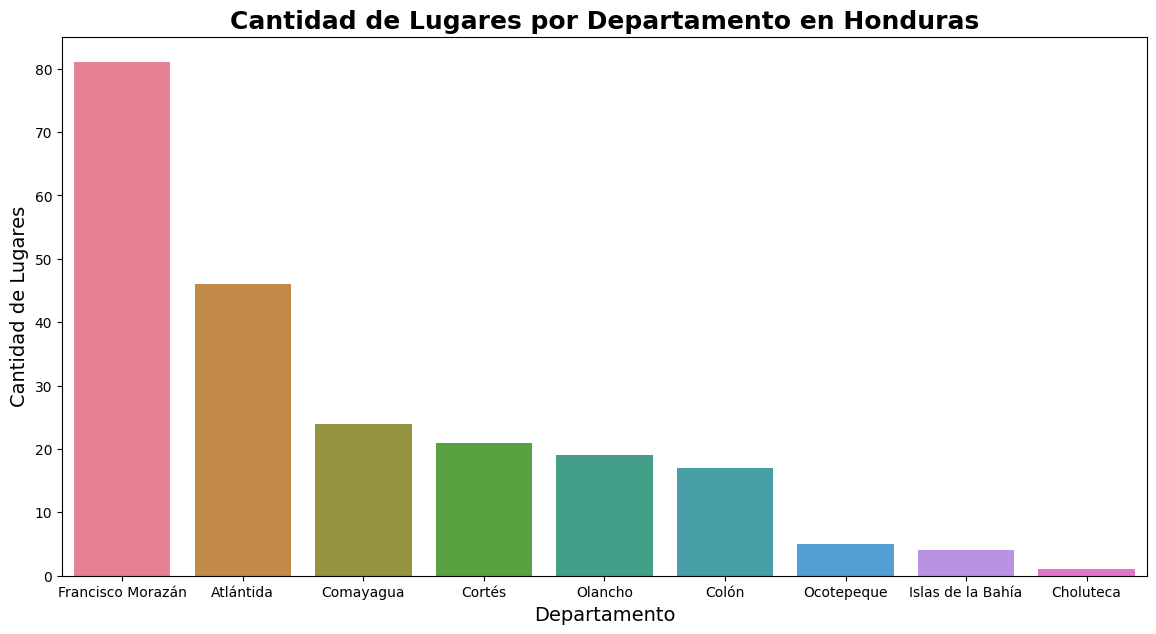

In [286]:

departamentos = honduras['Departamento'].value_counts()

plt.figure(figsize=(14, 7))  #Tamaño 
sns.barplot(x=departamentos.index, y=departamentos.values, palette="husl")
plt.title('Cantidad de Lugares por Departamento en Honduras', fontsize=18, fontweight='bold') 
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad de Lugares', fontsize=14)
plt.show()

Ahora veamos la diferencia de cantidad de restaurantes por departamento.

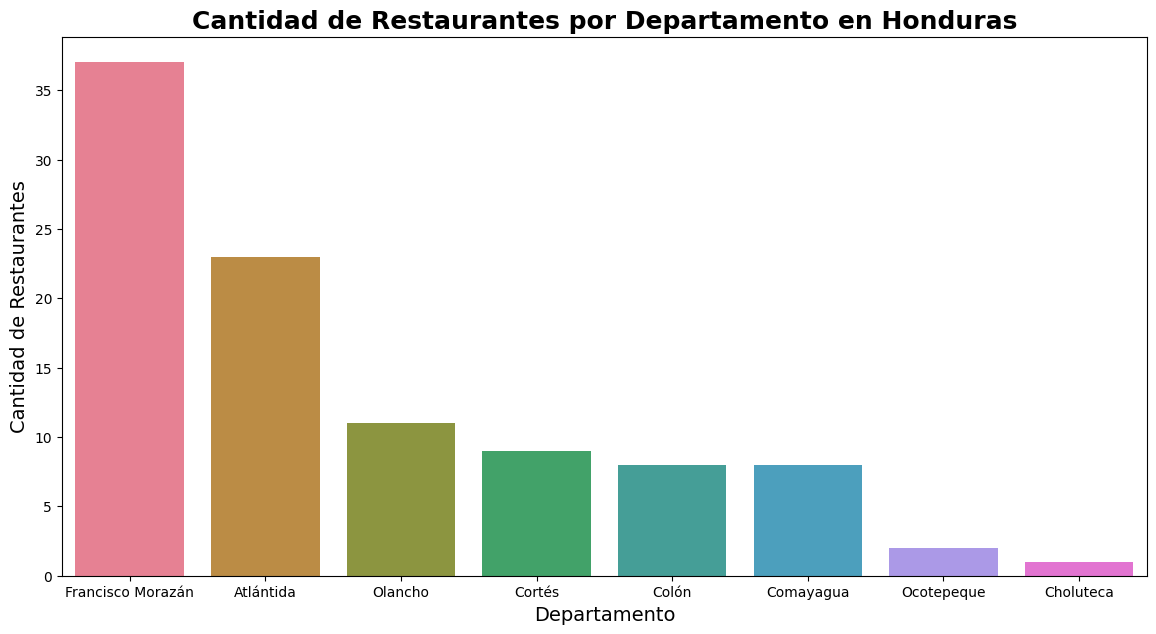

In [287]:

cant_resta_depart = restaurantes['Departamento'].value_counts()

plt.figure(figsize=(14, 7))
sns.barplot(x=cant_resta_depart.index, y=cant_resta_depart.values, palette="husl")
plt.title('Cantidad de Restaurantes por Departamento en Honduras', fontsize=18, fontweight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad de Restaurantes', fontsize=14)
plt.show()

Veamos las ubicaciones de todos los restaurantes que nos brinda foursquare	en Honduras.

In [288]:

#En este caso como latitudes y longitudes de DataFrame restaurantes no tenian indice[0], se utlizo la funcion iloc como solucion para acceder a la primera fila del dataframe (ver despues del mapa) 

mapa_restaurantes = folium.Map(location=[restaurantes['lugar_latitude'].iloc[0], restaurantes['lugar_longitude'].iloc[0]], zoom_start=8)

for index, row in restaurantes.iterrows():
    folium.Marker([row['lugar_latitude'], row['lugar_longitude']],
                  popup=row['Lugar'],
                  icon=folium.Icon(icon='map-marker')).add_to(mapa_restaurantes)
mapa_restaurantes

In [289]:
restaurantes.index

Int64Index([  4,   5,   6,   7,   8,   9,  10,  11,  13,  18,  19,  20,  25,
             26,  27,  28,  31,  32,  38,  39,  40,  41,  43,  46,  47,  48,
             49,  51,  52,  53,  54,  56,  57,  58,  59,  68,  71,  73,  76,
             78,  79,  80,  89,  90,  93,  94, 101, 102, 104, 105, 106, 110,
            112, 113, 114, 115, 116, 117, 118, 120, 122, 125, 126, 127, 128,
            129, 132, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144, 146,
            149, 151, 152, 155, 157, 162, 169, 180, 187, 197, 199, 200, 201,
            205, 207, 208, 210, 211, 213, 216, 217],
           dtype='int64')

Visualizemos en un grafico pastel el procentaje de restaurantes por Departamento

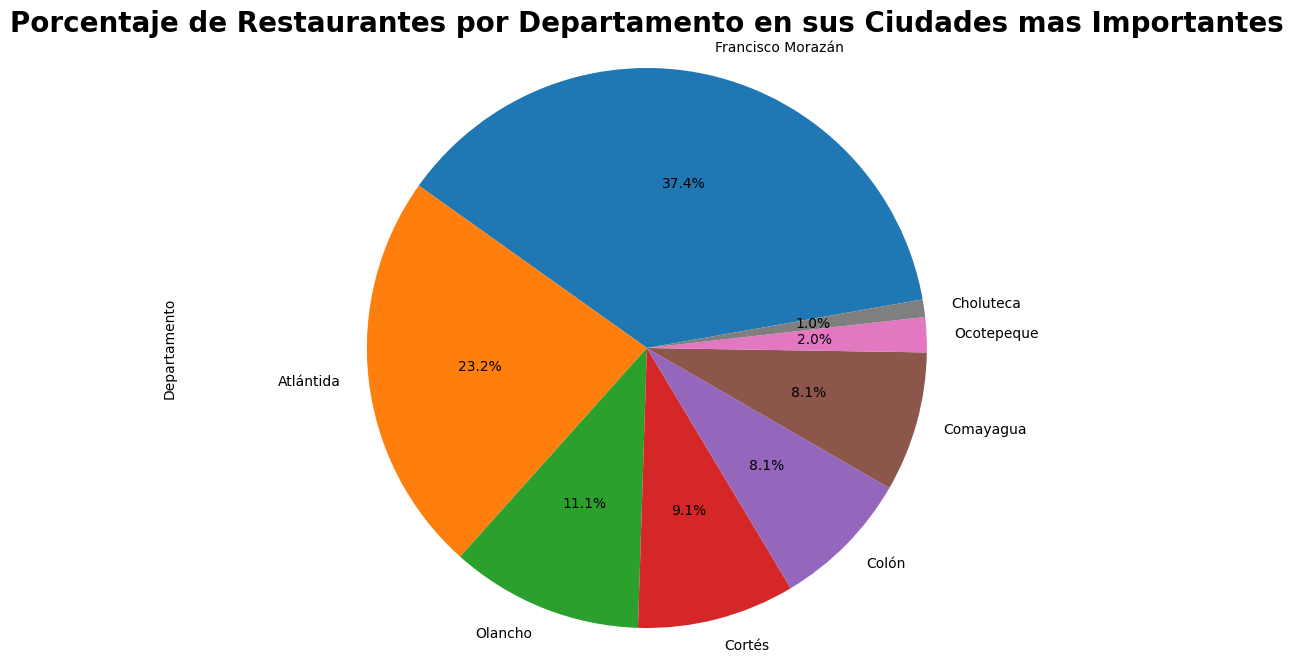

In [292]:
plt.figure(figsize=(12, 8))
restaurantes['Departamento'].value_counts().plot.pie(autopct='%1.1f%%', startangle=10)
plt.title('Porcentaje de Restaurantes por Departamento en sus Ciudades mas Importantes',size=20, weight='bold')
plt.axis('equal')
plt.show()

#5. Conclusión

Este proyecto de Ciencia de Datos Aplicada tiene como objetivo proporcionar información útil a los visitantes y viajeros que deseen explorar Honduras y encontrar opciones de lugares y comida en diferentes regiones del país, así como a las personas interesadas en abrir un restaurante en ciertas ciudades de Honduras. Se utiliza la API de Foursquare para obtener datos de ubicación de lugares y restaurantes en diferentes departamentos de Honduras, lastimosamente la api solo nos permite un limite de 50 lugares por solicitud (al utilizar la api de forma gratuita), y esto afecta a otra gran cantidad de lugares de estas ciudades que son las mas importantes de cada departamento.

El análisis de los datos obtenidos muestra que Francisco Morazán es el departamento con la mayor cantidad de lugares y restaurantes registrados, representando el 37.2% y 37.4% respectivamente. Le sigue Atlántida con el mayor porcentaje de restaurantes, con un 23.2% de los restaurantes registrados en Honduras.

En conclusión, este proyecto proporciona información valiosa sobre la distribución de lugares y restaurantes en diferentes regiones de Honduras, lo cual puede ser de utilidad para los visitantes y viajeros que deseen explorar el país y encontrar opciones de comida en diferentes departamentos. Además, puede ser de gran ayuda para las personas interesadas en abrir un restaurante en Honduras, al proporcionarles información sobre la distribución de restaurantes en diferentes ciudades del país y ayudarles a tomar decisiones informadas sobre dónde abrir su negocio.